Task 2 - Prediction of store sales

In [1]:
# Importing Necessary Packages
import warnings
warnings.filterwarnings("ignore")

import math
import time
from datetime import date, timedelta, datetime
import numpy as np
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
import pandas as pd

Setting Logging

In [2]:
import logging
import logging.handlers
import os

In [3]:
store_data = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\store.csv', na_values=['?', None, 'undefined'])
train_data = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\train.csv', na_values=['?', None, 'undefined'])
test_data = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\test.csv', na_values=['?', None, 'undefined'])
sample_data = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\sample_submission.csv', na_values=['?', None, 'undefined'])

In [4]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
print(f" Train Data with shape of: {train_data.shape}")
print(train_data.info())

 Train Data with shape of: (1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


In [6]:
train_data["Date"]=pd.to_datetime(train_data["Date"],infer_datetime_format=True)
train_data["Day"]=train_data["Date"].dt.day
train_data["Month"]=train_data["Date"].dt.month
train_data["Year"]=train_data["Date"].dt.year

In [7]:
print(f" Store Data with sape of {store_data.shape}")
print(store_data.info())

 Store Data with sape of (1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [8]:
print(f" Test Data with sape of {test_data.shape}")
print(test_data.info())

 Test Data with sape of (41088, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None


In [9]:
print(f" Sample Submission with sape of {sample_data.shape}")
print(sample_data.info())

 Sample Submission with sape of (41088, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None


It can be seen that, store dataset has many missing values, and test dataset has 11 missing value

Handling 'NA' values

- Store dataset

In [10]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# Sorting the dataset by Competition Distance, because competition distance has less 'NA' values
store_data.sort_values(by='CompetitionDistance')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
515,516,a,c,20.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
881,882,a,a,30.0,4.0,2013.0,0,NaN,NaN,NaN
1007,1008,a,c,30.0,9.0,2010.0,0,NaN,NaN,NaN
620,621,a,a,30.0,7.0,2002.0,0,NaN,NaN,NaN
987,988,a,a,30.0,11.0,2012.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
121,122,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN
452,453,a,c,75860.0,NaN,NaN,0,NaN,NaN,NaN
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


#### Handling the CompetitionDistance 'NA' values by filling with mean

In [12]:
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.mean(),inplace=True)
#store_data.sort_values(by='CompetitionDistance')

Dealing with 'CompetitionOpenSinceMonth, CompetitionOpenSinceYear' NA values

In [13]:
store_data[store_data['CompetitionOpenSinceYear'].isna() == True].describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,354.000000,354.000000,0.0,0.0,354.000000,206.000000,206.000000
mean,560.584746,5430.634755,NaN,NaN,0.581921,25.480583,2011.567961
std,321.188639,7375.534157,NaN,NaN,0.493941,14.858261,1.638781
min,12.000000,20.000000,NaN,NaN,0.000000,1.000000,2009.000000
25%,277.500000,647.500000,NaN,NaN,0.000000,13.000000,2010.000000
50%,529.000000,2560.000000,NaN,NaN,1.000000,27.000000,2012.000000
75%,852.500000,7877.500000,NaN,NaN,1.000000,40.000000,2013.000000
max,1115.000000,75860.000000,NaN,NaN,1.000000,50.000000,2015.000000


It can be seen that, both 'CompetitionOpenSinceMonth, CompetitionOpenSinceYear' are not-continuous data, therefore 'NA' will be filled with Mode

In [14]:
store_data.CompetitionOpenSinceMonth.fillna(store_data.CompetitionOpenSinceMonth.mode()[0],inplace=True)
store_data.CompetitionOpenSinceYear.fillna(store_data.CompetitionOpenSinceYear.mode()[0],inplace=True)
# store_data.sort_values(by='CompetitionOpenSinceYear')

Dealing with Promotions columns

From the above table it can be seen there is relation between Promo2 and 'Promo2SinceWeek, Promo2SinceYear, PromoInterval', when Promo2 is 0, all other promo columns are NaN

Verifying this hypothesis

In [15]:
store_data.query('PromoInterval.isnull() & Promo2 == 0', engine='python')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


Therefore, replacing all 'NaN' values of promo coulumns with 0

In [16]:
store_data.Promo2SinceWeek.fillna(0, inplace=True)
store_data.Promo2SinceYear.fillna(0, inplace=True)
store_data.PromoInterval.fillna(0, inplace=True)
# store_data.query('PromoInterval ==0 & Promo2 == 0', engine='python')

In [17]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


- Handling Missing data (NaN) Train Dataset

In [18]:
test_data.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

The Open column is not continuous, then filling the missing values with MOde method

In [19]:
test_data.Open.fillna(test_data.Open.mode()[0],inplace=True)
# test_data.sort_values(by='Open')

Feature extraction and Generation in Train and Test Datasets

Adding the following features,

. weekdays

. weekends

. number of days to holidays

. Number of days after holiday

. Beginning of month, mid month and ending of month

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
data = train_data

# Preprocess data to handle non-numeric columns
# Drop non-numeric columns or handle them appropriately
numeric_data = data.select_dtypes(include='number')  # Select numeric columns

# Handle NaN values for numeric data
imputer = SimpleImputer(strategy="median")
numeric_data_filled = imputer.fit_transform(numeric_data)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Function to find holiday
def find_holiday(date):
    # Mock implementation, replace with your actual logic to find holidays
    return date in ["2024-01-01", "2024-07-04"]  # Example holidays

# Extract features from datetime
# Preprocessing
# Extract features from datetime
data['Date'] = pd.to_datetime(data['Date'])
data['weekday'] = data['Date'].dt.weekday
data['weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
data['is_beginning_of_month'] = (data['Date'].dt.day <= 10).astype(int)  # Beginning
data['is_mid_month'] = ((data['Date'].dt.day > 10) & (data['Date'].dt.day <= 20)).astype(int)  # Mid
data['is_end_of_month'] = (data['Date'].dt.day > 20).astype(int)  # End

# Add more features as needed

In [21]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,weekday,weekend,is_beginning_of_month,is_mid_month,is_end_of_month
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,4,0,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,4,0,0,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,4,0,0,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,4,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0


In [22]:
# Drop the original 'Date' column
#data.drop('Date', axis=1, inplace=True)

In [23]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,weekday,weekend,is_beginning_of_month,is_mid_month,is_end_of_month
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,4,0,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,4,0,0,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,4,0,0,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,4,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1,0,1,0,0


### Merging store dataset to Train, and test dataset

In [24]:
# Assuming 'data' and 'store_data' are your DataFrames

# Merging test and store data
train_store_data = pd.merge(data, store_data, how='left', left_on='Store', right_on='Store')

# Drop unnecessary columns
#train_store_data.drop(['Store_y'], axis=1, inplace=True)

# Rename the remaining 'Store_x' column to 'Store'
train_store_data = train_store_data.rename(columns={'Store_x': 'Store'})

In [25]:
# test_data = test_data.drop(columns=['Id'])
train_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Day', 'Month', 'Year', 'weekday',
       'weekend', 'is_beginning_of_month', 'is_mid_month', 'is_end_of_month',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [26]:
# train_store_data.head(4)
train_store_data.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,is_end_of_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,...,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,31,...,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,...,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0


In [27]:
train_store_data.shape

(1017209, 26)

In [28]:
train_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Day                        1017209 non-null  int32         
 10  Month                      1017209 non-null  int32         
 11  Year                       1017209 no

In [29]:
# Assuming 'data' and 'store_data' are your DataFrames

# Merging test and store data
test_store_data = pd.merge(test_data, store_data, how='left', left_on='Store', right_on='Store')

# Drop unnecessary columns
#train_store_data.drop(['Store_y'], axis=1, inplace=True)

# Rename the remaining 'Store_x' column to 'Store'
test_store_data = test_store_data.rename(columns={'Store_x': 'Store'})

In [30]:
test_store_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [31]:
# Assuming 'test_store_data' is your DataFrame
#test_store_data.drop(columns=['Date', 'Id'], axis=1, inplace=True)

In [32]:
test_store_data.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0


In [33]:
test_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

### Converting non-numeric columns to numerical

In [34]:
# Converting all values in these columns to string
def convert_to_string(dataset):
    dataset['StateHoliday'] = dataset['StateHoliday'].apply(str)
    dataset['StoreType'] = dataset['StoreType'].apply(str)
    dataset['Assortment'] = dataset['Assortment'].apply(str)
    dataset['PromoInterval'] = dataset['PromoInterval'].apply(str)

In [35]:
convert_to_string(train_store_data)
convert_to_string(test_store_data)

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
enc = LabelEncoder()
column_list = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
try:
    for column in column_list:
        enc.fit(train_store_data[column])
        train_store_data[column] = enc.transform(train_store_data[column])
        logging.info(f"Changing non-numeric to numeric values, successfully")

    for column in column_list:
        enc.fit(test_store_data[column])
        test_store_data[column] = enc.transform(test_store_data[column])
        logging.info(f"Changing non-numeric to numeric values, successfully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [37]:
try:
    
    enc.fit(test_data['StateHoliday'])
    test_data['StateHoliday'] = enc.transform(test_data['StateHoliday'])
    logging.info(f"Changing non-numeric to numeric values, successfully")
except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [38]:
train_store_data.sample(4)
# test_store_data.sample(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,is_end_of_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
331355,649,7,2014-09-21,0,0,0,0,0,0,21,...,1,0,0,14570.0,11.0,2002.0,0,0.0,0.0,0
873454,80,4,2013-05-09,0,0,0,0,1,0,9,...,0,3,0,7910.0,9.0,2013.0,0,0.0,0.0,0
274431,784,5,2014-11-21,6919,787,1,0,0,0,21,...,1,0,0,560.0,10.0,2014.0,1,10.0,2014.0,2
73506,1032,3,2015-05-27,8035,826,1,0,0,0,27,...,1,3,2,270.0,2.0,2013.0,1,40.0,2012.0,2


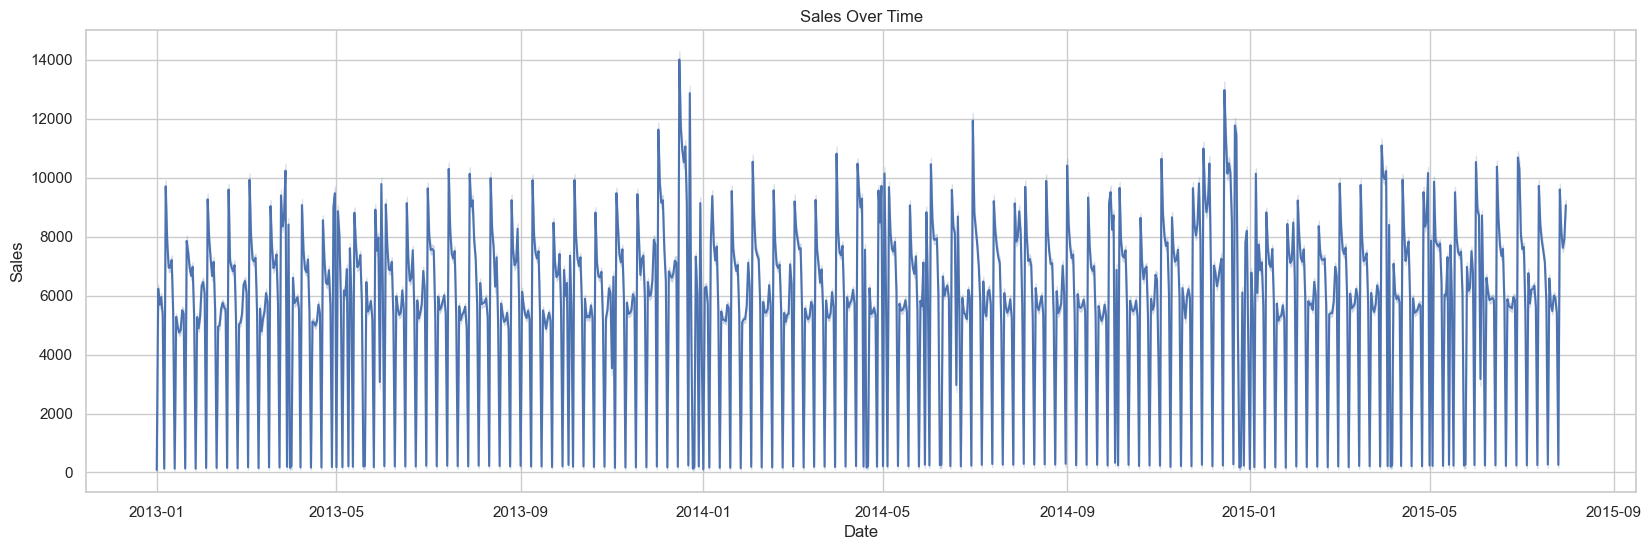

In [39]:
# Assuming 'train_store_data' is your DataFrame

# Convert 'Date' column to datetime if it's not already in datetime format
train_store_data['Date'] = pd.to_datetime(train_store_data['Date'])

# Plotting
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
sns.lineplot(x='Date', y='Sales', data=train_store_data)

plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#### Scaling the Train_store Dataset

In [40]:
# test_data.columns.tolist()

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = ['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
            'WeekOfYear', 'Weekofmonth', 'days_to_from_hol', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
test_column = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'Weekofmonth', 'days_to_from_hol']

temp_train_store_data = train_store_data.copy()
temp_test_data = test_data.copy()

try:
    for i in num_cols:
    
        # fit on training data column
        scale = scaler.fit(temp_train_store_data[[i]])
        
        # transform the training data column
        temp_train_store_data[i] = scale.transform(temp_train_store_data[[i]])
    
    for i in test_column:
    
        # fit on training data column
        scale = scaler.fit(temp_test_data[[i]])
        
        # transform the training data column
        temp_test_data[i] = scale.transform(temp_test_data[[i]])
        
    logging.info(f"Dataset Normalizing successfully")
except Exception as e:
    logging.debug(f"Exception occured in Normalizing the dataset, {e}")

In [42]:
temp_train_store_data.describe()
# temp_test_data.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,is_end_of_month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,4.997234e-01,2014-04-11 01:30:42.846061824,1.389574e-01,8.569923e-02,8.301067e-01,3.815145e-01,1.505426e-02,1.786467e-01,4.900930e-01,...,3.416309e-01,1.207467e+00,9.351412e-01,5.430020e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,9.803492e-01
min,1.000000e+00,0.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,1.666667e-01,2013-08-17 00:00:00,8.969700e-02,5.481862e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.333333e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,5.000000e-01,2014-04-02 00:00:00,1.382398e-01,8.243097e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00
75%,8.380000e+02,8.333333e-01,2014-12-12 00:00:00,1.890689e-01,1.132918e-01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.333333e-01,...,1.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.000000e+00
max,1.115000e+03,1.000000e+00,2015-07-31 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,3.000000e+00
std,3.219087e+02,3.328985e-01,NaN,9.265544e-02,6.286028e-02,3.755392e-01,4.857586e-01,9.455196e-02,3.830564e-01,2.929213e-01,...,4.742567e-01,1.365376e+00,9.938011e-01,7.705298e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,1.081878e+00


<Axes: xlabel='Date', ylabel='Sales'>

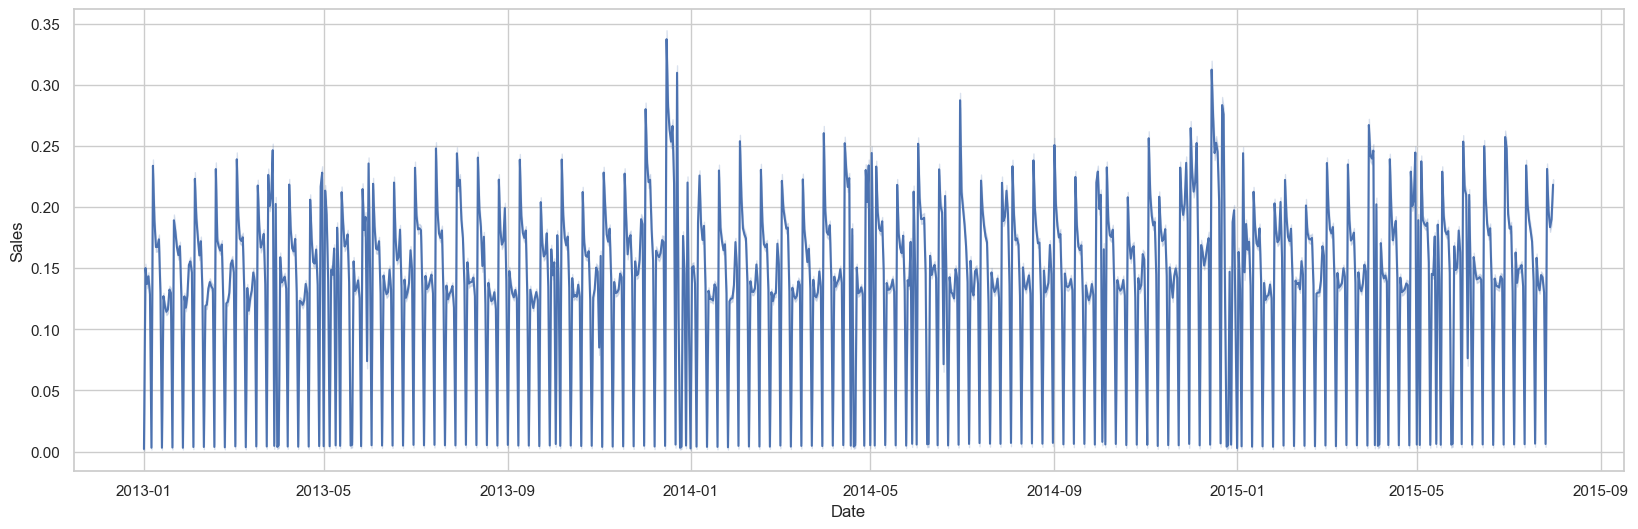

In [43]:
# Using Scaled Units
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
sns.lineplot(x='Date',y='Sales',data=temp_train_store_data)

Note:-The graph of Sales Vs Date for both un-scaled and Scaled data are both the same

The Dataset has been Scaled

#### 2.2 Building models with sklearn pipelines
Using Random forests Regressor

In [44]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\train.csv')

In [45]:
# Sample a fraction of the dataset (e.g., 50%)
new_data = df.sample(frac=0.3, random_state=42)  # Adjust the fraction as needed

# Save the sampled data to a new CSV file
new_data.to_csv('Frec_data.csv', index=False)

In [46]:
train_data = pd.read_csv(r'Frec_data.csv')

In [47]:
train_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,616,7,2015-05-24,0,0,0,0,0,0
1,592,2,2013-03-26,5548,710,1,1,0,1
2,526,6,2013-09-14,7467,1150,1,0,0,0


In [48]:
# Extract features from datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['weekday'] = train_data['Date'].dt.weekday
train_data['weekend'] = train_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [49]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,weekday,weekend
0,616,7,2015-05-24,0,0,0,0,0,0,6,1
1,592,2,2013-03-26,5548,710,1,1,0,1,1,0
2,526,6,2013-09-14,7467,1150,1,0,0,0,5,1
3,601,2,2013-07-23,3360,323,1,0,0,1,1,0
4,953,1,2014-12-15,11414,853,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
305158,629,6,2013-03-02,7615,726,1,0,0,0,5,1
305159,161,6,2014-08-16,6444,742,1,0,0,0,5,1
305160,206,6,2013-06-22,4040,470,1,0,0,0,5,1
305161,880,7,2014-09-21,0,0,0,0,0,0,6,1


In [50]:
train_data.drop(['Date'],axis=1,inplace=True)

In [51]:
train_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,weekday,weekend
0,616,7,0,0,0,0,0,0,6,1
1,592,2,5548,710,1,1,0,1,1,0
2,526,6,7467,1150,1,0,0,0,5,1
3,601,2,3360,323,1,0,0,1,1,0
4,953,1,11414,853,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
305158,629,6,7615,726,1,0,0,0,5,1
305159,161,6,6444,742,1,0,0,0,5,1
305160,206,6,4040,470,1,0,0,0,5,1
305161,880,7,0,0,0,0,0,0,6,1


In [52]:
column =  {'StateHoliday':'IsHoliday','weekend':'IsWeekend'}

In [53]:
train_data.rename(columns=column,inplace=True)

In [54]:
train_data.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,IsHoliday,SchoolHoliday,weekday,IsWeekend
0,616,7,0,0,0,0,0,0,6,1
1,592,2,5548,710,1,1,0,1,1,0


In [55]:
from sklearn.preprocessing import LabelEncoder

# Assuming train_data is a pandas DataFrame and 'IsHoliday' is the column name you're trying to encode
enc = LabelEncoder()

# Convert all values to strings
train_data['IsHoliday'] = train_data['IsHoliday'].astype(str)

# Fit the encoder
train_data['IsHoliday'] = enc.fit_transform(train_data['IsHoliday'])


In [56]:
train_data['IsHoliday'].unique()

array([0, 1, 2, 3])

In [57]:
train_data.head(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,IsHoliday,SchoolHoliday,weekday,IsWeekend
0,616,7,0,0,0,0,0,0,6,1
1,592,2,5548,710,1,1,0,1,1,0
2,526,6,7467,1150,1,0,0,0,5,1


In [58]:
train_data.to_csv('finel_train_data.csv')

In [59]:
y_target = train_data['Sales']
x_features =  train_data.drop(['Sales'],axis=1)

In [60]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.20, random_state=15)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [62]:
# Define the imputer and regressor
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('regressor', regressor)
])

# Fit the pipeline to the data
pipeline.fit(x_train, y_train)

# Predict using the fitted pipeline
y_pred = pipeline.predict(x_test)

# Calculate the mean squared error
lr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", lr_mse)

Mean Squared Error: 2171675.691469808


In [63]:
### Pipe Lines ###

rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])

In [64]:
rfr.fit(x_train, y_train)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regretion', DecisionTreeRegressor(random_state=0))])

In [65]:
rfr_score = rfr.score(x_test, y_test)
lr_score = lr.score(x_test, y_test)
dt_score = dt.score(x_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

# print(rfr_score)

Prediction Score of the RandomForestRegretion is 86.31%
Prediction Score of the LinearRegretion is 85.48%
Prediction Score of the DecisionTree is 91.78%


In [66]:
dt_score

0.9178454355978313

In [67]:
# Now you can use the pipeline to make predictions
predictions_1 = rfr.predict(x_test)
predictions_2 = lr.predict(x_test)
predictions_3 = dt.predict(x_test)


In [68]:
predictions_1

array([4633.84790087, 3638.52434161, 5555.10131618, ..., 6241.62411478,
       4633.84790087, 6463.17124835])

2.3 Choose a loss function

In [69]:
rfr_prediction = rfr.predict(x_test)
lr_prediction = lr.predict(x_test)
dt_prediction = dt.predict(x_test)

(array([10903., 11006., 20470., 11464.,  5260.,   950.,   723.,   198.,
           35.,    24.]),
 array([1.25320310e-03, 2.44929699e+03, 4.89859272e+03, 7.34788846e+03,
        9.79718420e+03, 1.22464799e+04, 1.46957757e+04, 1.71450714e+04,
        1.95943671e+04, 2.20436629e+04, 2.44929586e+04]),
 <BarContainer object of 10 artists>)

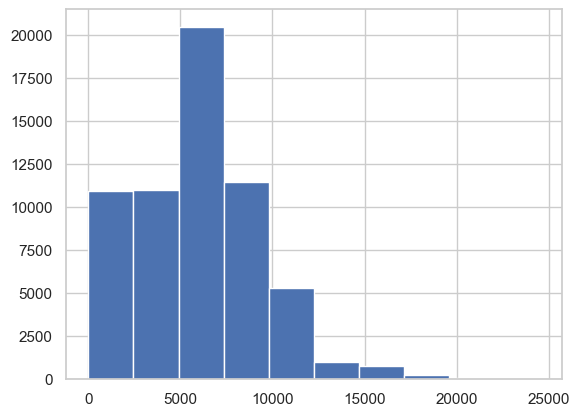

In [70]:
plt.hist(rfr_prediction)

(array([1.0398e+04, 1.8542e+04, 2.5220e+04, 5.2570e+03, 9.7200e+02,
        3.1200e+02, 2.0000e+02, 1.0300e+02, 2.4000e+01, 5.0000e+00]),
 array([-1037.7426793,  2395.8135707,  5829.3698207,  9262.9260707,
        12696.4823207, 16130.0385707, 19563.5948207, 22997.1510707,
        26430.7073207, 29864.2635707, 33297.8198207]),
 <BarContainer object of 10 artists>)

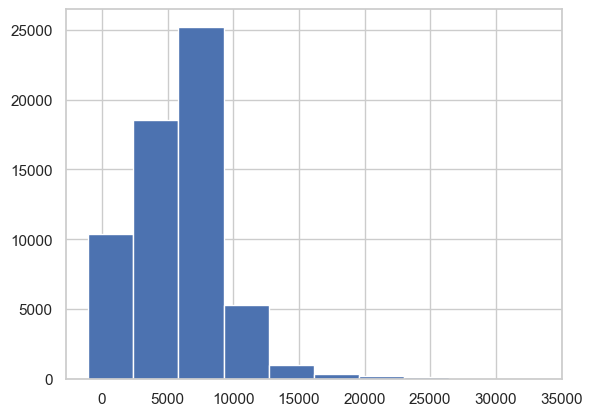

In [71]:
plt.hist(lr_prediction)

(array([1.7735e+04, 3.0291e+04, 1.0284e+04, 2.0070e+03, 5.2200e+02,
        1.5100e+02, 2.8000e+01, 1.3000e+01, 1.0000e+00, 1.0000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

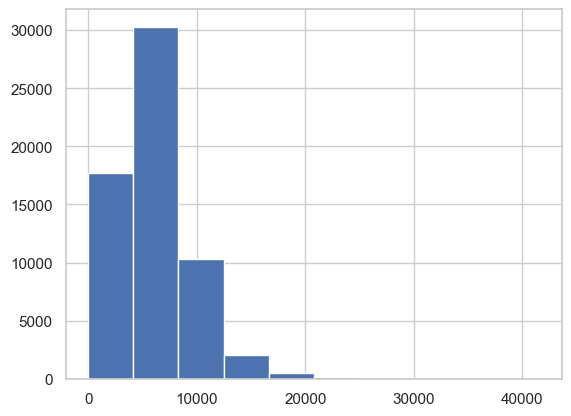

In [72]:
plt.hist(dt_prediction)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
Error = rfr_prediction-y_test
Error

161321   -643.152099
38258     828.524342
151768    485.101316
275902    400.030269
185797    460.458904
             ...    
109981    802.561957
277828      0.001253
251279    910.624115
193807    112.847901
80596    -522.828752
Name: Sales, Length: 61033, dtype: float64

In [75]:
# Evaluate performance using metrics
rft_mse = mean_squared_error(y_test, rfr_prediction )
lr_mse = mean_squared_error(y_test,lr_prediction)
dt_mse = mean_squared_error(y_test,dt_prediction)

print(f"RandomForest Mean Square Error : {rft_mse}")
print(f"Linear Mean Square Error : {lr_mse}")
print(f"DecisionTree Mean Square Error : {dt_mse}")

RandomForest Mean Square Error : 2048026.0420735145
Linear Mean Square Error : 2171739.348370936
DecisionTree Mean Square Error : 1229090.4033840073


In [76]:
# Evaluate performance using metrics
rft_mae = mean_absolute_error(y_test, rfr_prediction )
lr_mae = mean_absolute_error(y_test,lr_prediction)
dt_mae = mean_absolute_error(y_test,dt_prediction)

print(f"RandomForest Mean Absolute Error : {rft_mae}")
print(f"Linear Mean Absolute Error : {lr_mae}")
print(f"DecisionTree Mean Absolute Error : {dt_mae}")

RandomForest Mean Absolute Error : 941.8205220827202
Linear Mean Absolute Error : 981.9645553297139
DecisionTree Mean Absolute Error : 612.3838934128531


In [77]:
def rmse(predictions, targets):
    return np.sqrt((( rfr_prediction-y_test ) ** 2).mean())

In [78]:
rft_rmse = rmse(rfr_prediction ,y_test)
lr_rmse = rmse(lr_prediction ,y_test)
dt_rmse = rmse(dt_prediction,y_test)

print(f"RandomForest Root Mean Squared Error : {rft_rmse}")
print(f"Linear Mean Root Mean Squared Error : {lr_rmse}")
print(f"DecisionTree Root Mean Squared Error : {dt_rmse}")

RandomForest Root Mean Squared Error : 1431.0926042969807
Linear Mean Root Mean Squared Error : 1431.0926042969807
DecisionTree Root Mean Squared Error : 1431.0926042969807


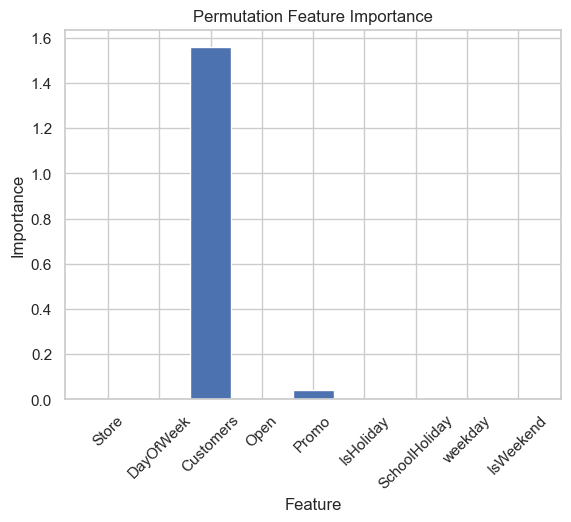

95% Confidence Interval: [0.         1.25502591]


In [79]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
perm_importance = permutation_importance(rfr, x_test, y_test)

# Plot feature importance
plt.bar(x_features.columns, perm_importance.importances_mean)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Estimate confidence interval (e.g., 95% confidence interval)
confidence_interval = np.percentile(perm_importance.importances_mean, [2.5, 97.5])
print("95% Confidence Interval:", confidence_interval)


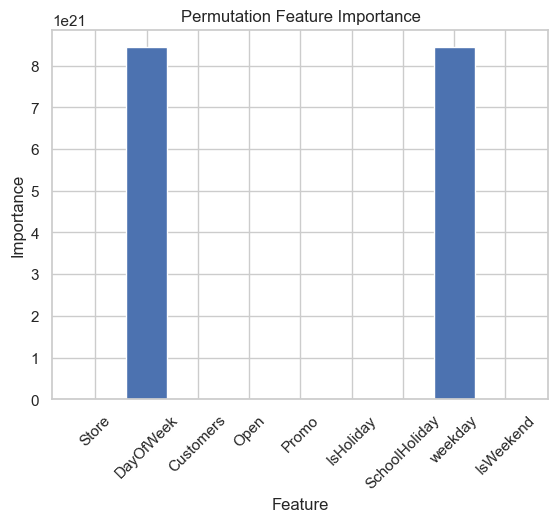

95% Confidence Interval: [3.54452967e-04 8.44063929e+21]


In [80]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
perm_importance = permutation_importance(lr, x_test, y_test)

# Plot feature importance
plt.bar(x_features.columns, perm_importance.importances_mean)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Estimate confidence interval (e.g., 95% confidence interval)
confidence_interval = np.percentile(perm_importance.importances_mean, [2.5, 97.5])
print("95% Confidence Interval:", confidence_interval)

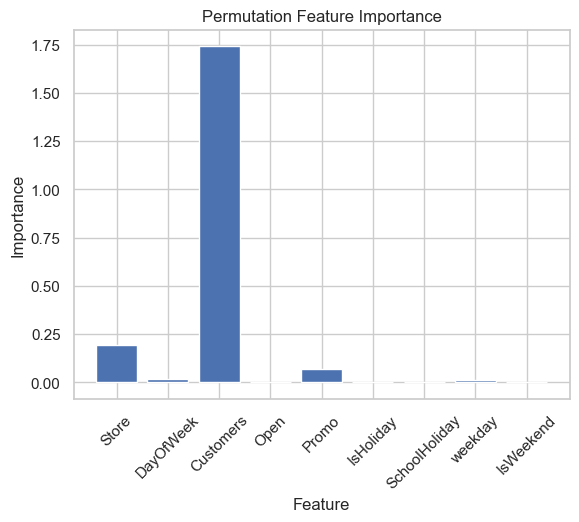

95% Confidence Interval: [-4.13493268e-05  1.43138788e+00]


In [81]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
perm_importance = permutation_importance(dt, x_test, y_test)

# Plot feature importance
plt.bar(x_features.columns, perm_importance.importances_mean)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Estimate confidence interval (e.g., 95% confidence interval)
confidence_interval = np.percentile(perm_importance.importances_mean, [2.5, 97.5])
print("95% Confidence Interval:", confidence_interval)

In [82]:
# Assuming x_train and y_train are already defined

# Define your pipeline
rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

# Fit the pipeline
rfr.fit(x_train, y_train)

# Access feature importances
feature_importances = rfr.named_steps['rfr_regretion'].feature_importances_

# Create DataFrame with feature importances
df_feature_importances = pd.DataFrame(index=x_train.columns,
                                      data=feature_importances,
                                      columns=['feature importances'])

# Sort and display
df_feature_importances_sorted = df_feature_importances.sort_values('feature importances', ascending=False)
print(df_feature_importances_sorted)

               feature importances
Customers                 0.974426
Promo                     0.025316
Store                     0.000214
IsWeekend                 0.000019
weekday                   0.000013
DayOfWeek                 0.000012
Open                      0.000000
IsHoliday                 0.000000
SchoolHoliday             0.000000


### Serialize models

In [83]:
## use picke to dump mode
## decomment picke to save the model
import pickle
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [84]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
# Serialize the model
#with open('Model.pkl', 'wb') as f:
 #   pickle.dump(model, f)

In [86]:
joblib.dump(model,'DecisionTreeRegressor_model.pkl')

['DecisionTreeRegressor_model.pkl']

In [87]:
model_1 = joblib.load('DecisionTreeRegressor_model.pkl')
# Function to make the prediction 
def prediction(x_train,y_train):
    prediction = model_1.predict(x_train,y_train)
    return prediction

In [88]:
def prediction(x_test, new_model):
    prediction = new_model.predict(x_test)
    return prediction

# Call the prediction function with x_test and the trained model
predictions = prediction(x_test, model_1)


In [89]:
predictions

array([4025., 2805., 5264., ..., 5192., 4665., 6778.])

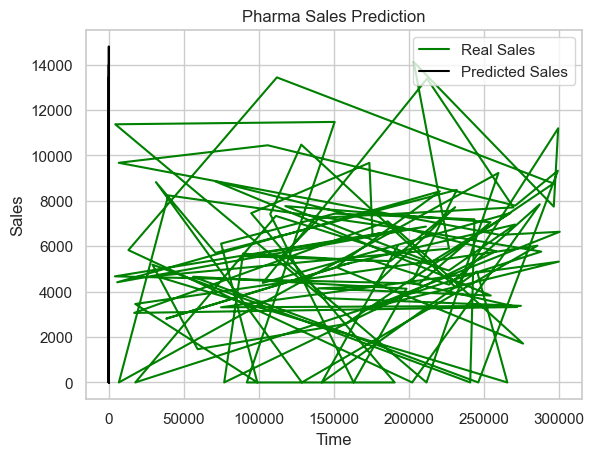

In [90]:
plt.plot(y_test[:100], color = 'green', label = 'Real Sales')
plt.plot(predictions[:100], color = 'black', label = 'Predicted Sales')
plt.title('Pharma Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()